# Principal Components Analysis Nutrition Exercise
En este ejercicio no vas a montar ningún modelo de Machine Learning supervisado, sino aprenderás a trabajar con PCA: pretratar el dato antes de calcular sus PCs, interpretarlos, graficar y escoger número de componentes según varianza.

Importa las librerías necesarias

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Importa los datos
1. Importa los datos: *nndb.csv*
2. Observa las columnas que hay, así como su tipo.

In [150]:
df = pd.read_csv('data/nndb_flat.csv')
df.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


In [152]:
df.describe()

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
count,8618.000000,8618.000000,8618.00000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,...,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000
mean,15467.757368,226.438617,11.52391,10.647024,21.819062,6.560253,2.023242,93.968786,0.264369,1.225260,...,0.125765,0.213222,0.182499,0.174881,0.061176,0.000191,0.077965,0.222838,0.229363,0.179111
std,9221.428766,169.388910,10.55059,15.866353,27.239000,13.602098,4.313670,779.362205,0.478614,4.319183,...,0.466402,0.302161,0.346062,0.431974,0.167803,0.000615,0.133496,0.290133,0.514406,0.305292
min,1001.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8695.250000,93.000000,2.47000,0.992500,0.040000,0.000000,0.000000,0.000000,0.034250,0.000000,...,0.000000,0.023875,0.035385,0.025000,0.007500,0.000033,0.023810,0.052857,0.001818,0.020909
50%,14273.000000,191.000000,8.28500,5.235000,8.945000,0.370000,0.300000,1.500000,0.120000,0.080000,...,0.017500,0.131250,0.115385,0.064583,0.015833,0.000088,0.047619,0.190000,0.070909,0.076818
75%,20050.750000,336.000000,19.97750,13.900000,32.900000,5.300000,2.400000,21.000000,0.355000,1.297500,...,0.062500,0.314328,0.200000,0.185833,0.051667,0.000161,0.069048,0.308571,0.387273,0.245455
max,93600.000000,902.000000,88.32000,100.000000,100.000000,99.800000,79.000000,30000.000000,12.000000,98.890000,...,14.702500,7.968750,13.461538,19.479167,6.136667,0.016722,1.859524,14.168571,34.854545,8.268182


<Axes: xlabel='Carb_g'>

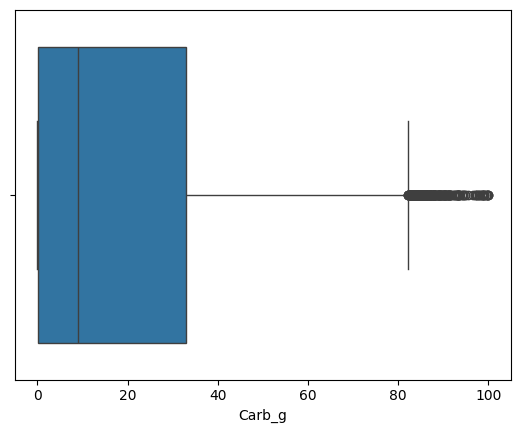

In [153]:
sns.boxplot(df, x="Carb_g")

<Axes: xlabel='Sugar_g'>

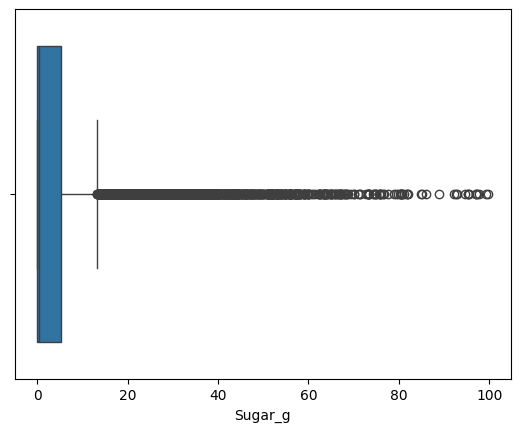

In [154]:
sns.boxplot(df, x="Sugar_g")

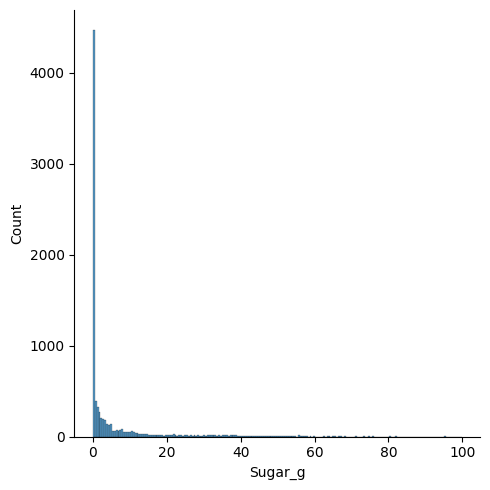

In [155]:
sns.displot(df, x="Sugar_g")

In [156]:
len(df[df['Carb_g']>83])

229

In [157]:
len(df[df['Sugar_g']>17])

1118

In [158]:
df_outliers = df[['Carb_g', 'Sugar_g']]
df_outliers

,Carb_g,Sugar_g
0,0.06,0.06
1,0.06,0.06
2,0.00,0.00
3,2.34,0.50
4,2.79,0.51
...,...,...
8613,0.00,0.00
8614,5.41,0.00
8615,73.14,73.20
8616,2.00,0.00


In [159]:
df_outliers['outlier_drop'] = np.where((df_outliers['Carb_g']>83) & (df_outliers['Sugar_g']>17), 1, 0)
df_losoutliers = df_outliers[df_outliers['outlier_drop']==1]
df_losoutliers

C:\Users\hegoi\AppData\Local\Temp\ipykernel_7464\2596445630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers['outlier_drop'] = np.where((df_outliers['Carb_g']>83) & (df_outliers['Sugar_g']>17), 1, 0)


,Carb_g,Sugar_g,outlier_drop
295,86.68,57.40,1
1818,88.20,43.70,1
1820,85.51,44.32,1
1821,85.93,44.20,1
1824,87.90,38.60,1
...,...,...,...
8433,84.70,36.13,1
8477,92.39,44.97,1
8478,88.00,70.00,1
8504,89.11,85.19,1


In [160]:
df_filtrado = df_outliers[df_outliers['outlier_drop']==0]
df_filtrado

,Carb_g,Sugar_g,outlier_drop
0,0.06,0.06,0
1,0.06,0.06,0
2,0.00,0.00,0
3,2.34,0.50,0
4,2.79,0.51,0
...,...,...,...
8613,0.00,0.00,0
8614,5.41,0.00,0
8615,73.14,73.20,0
8616,2.00,0.00,0


### Mira a ver la correlación entre las variables numéricas
¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

<Axes: >

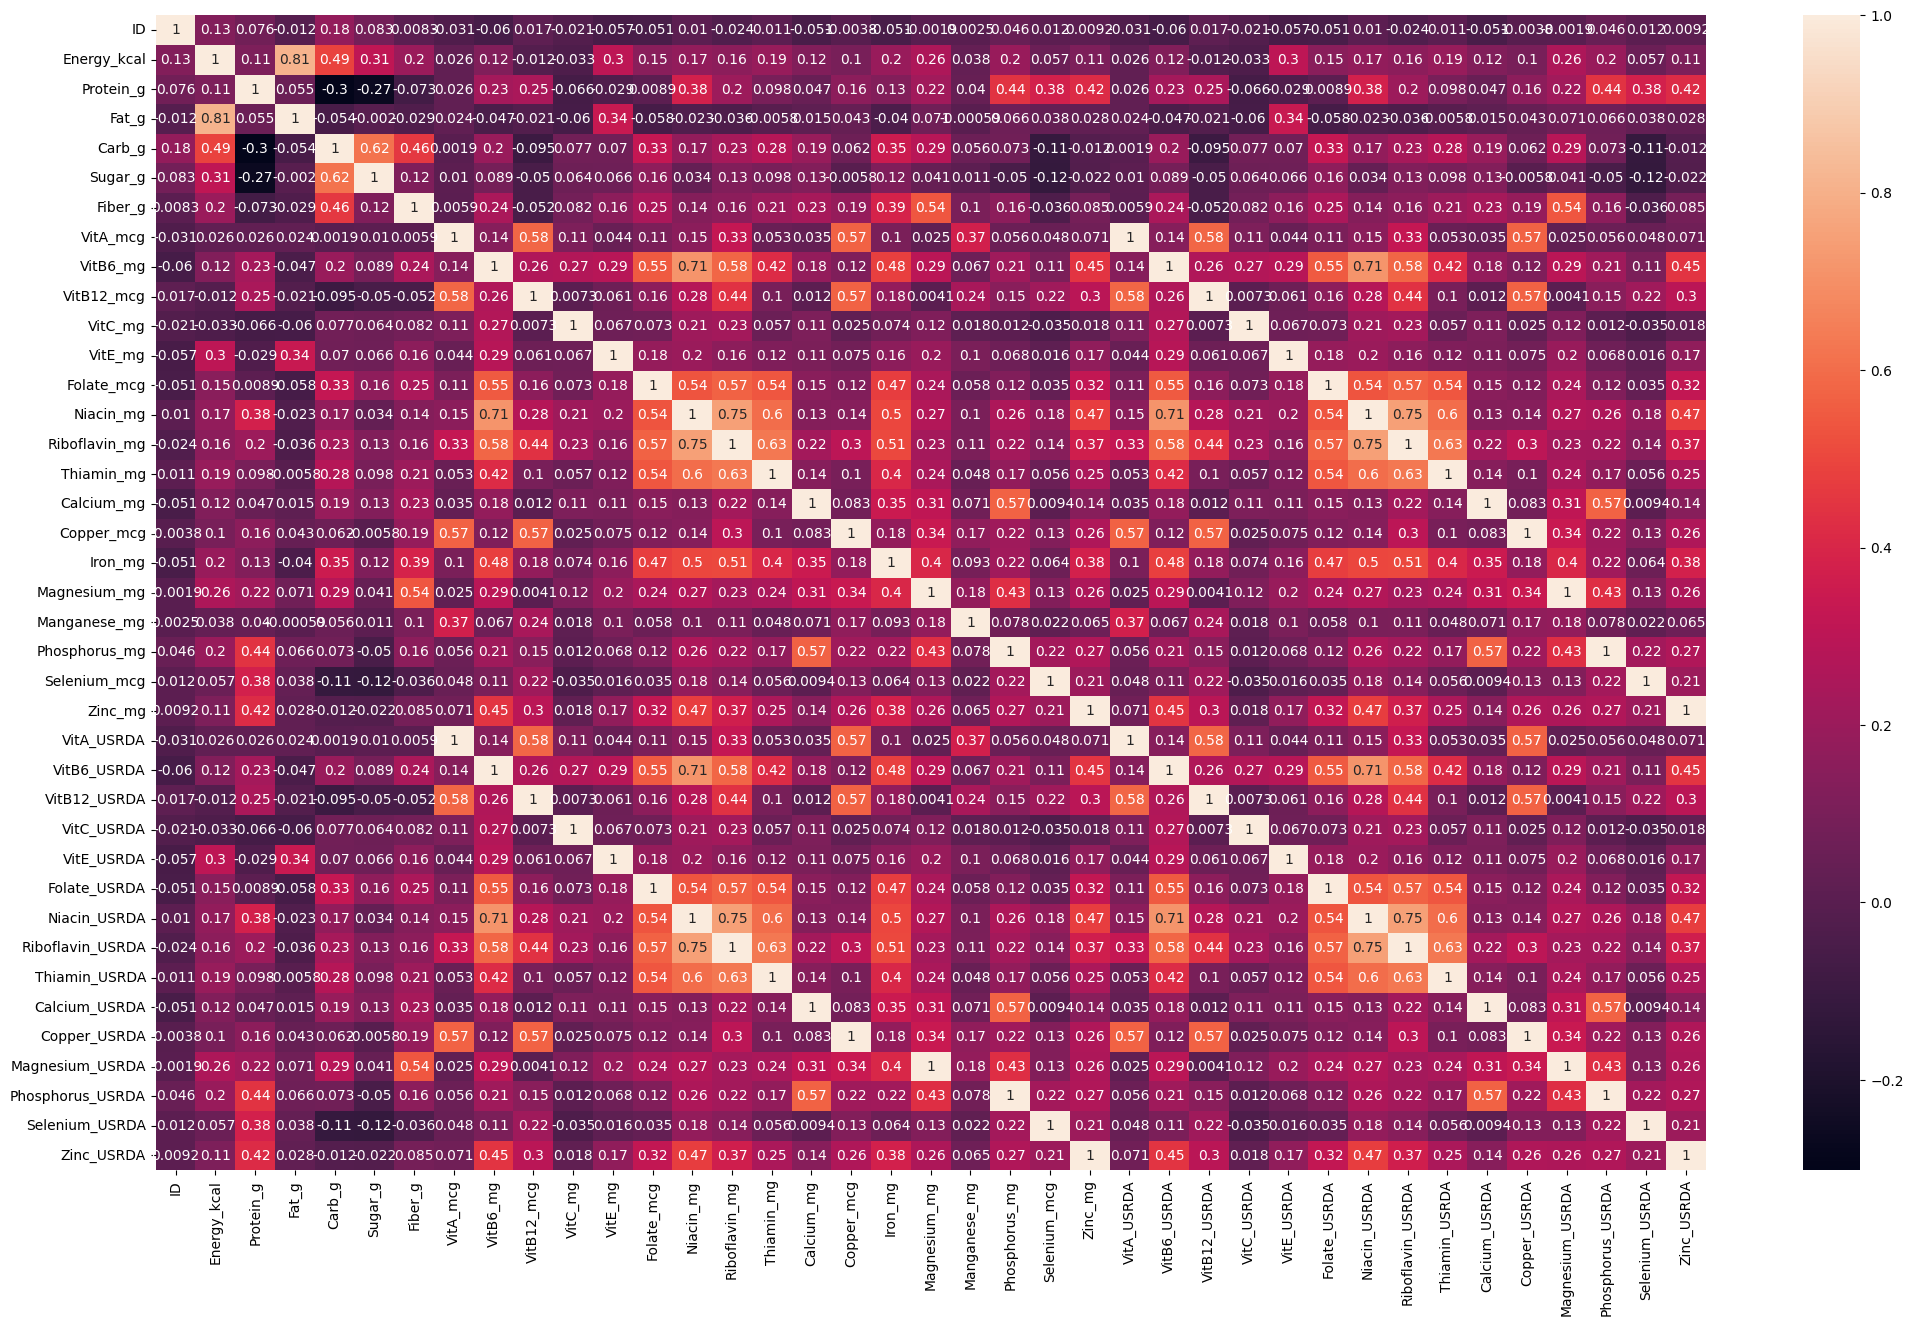

In [161]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [162]:
df.columns[df.columns.str.contains("USRDA")]

Index(['VitA_USRDA', 'VitB6_USRDA', 'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA',
       'Folate_USRDA', 'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA',
       'Calcium_USRDA', 'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA',
       'Selenium_USRDA', 'Zinc_USRDA'],
      dtype='object')

In [163]:
df.drop(columns=df.columns[df.columns.str.contains("USRDA")], inplace=True)
df.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60


### Variables no numéricas
Elimina las variables de texto del dataset

In [164]:
df.dtypes

ID                  int64
FoodGroup          object
ShortDescrip       object
Descrip            object
CommonName         object
MfgName            object
ScientificName     object
Energy_kcal       float64
Protein_g         float64
Fat_g             float64
Carb_g            float64
Sugar_g           float64
Fiber_g           float64
VitA_mcg          float64
VitB6_mg          float64
VitB12_mcg        float64
VitC_mg           float64
VitE_mg           float64
Folate_mcg        float64
Niacin_mg         float64
Riboflavin_mg     float64
Thiamin_mg        float64
Calcium_mg        float64
Copper_mcg        float64
Iron_mg           float64
Magnesium_mg      float64
Manganese_mg      float64
Phosphorus_mg     float64
Selenium_mcg      float64
Zinc_mg           float64
dtype: object

In [165]:
df = df.iloc[:,7:].copy()
df.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,...,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,...,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,...,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,...,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,...,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60


### Distribuciones
Muchas de las variables tienen asimetría hacia la derecha. Deberíamos transformarlas para conseguir distribuciones normales y mejorar las correlaciones de cara al PCA y a futuros modelos lineales que vayamos a probar. Transforma todas las variables realizando una transformación Logarítmica.

<Axes: >

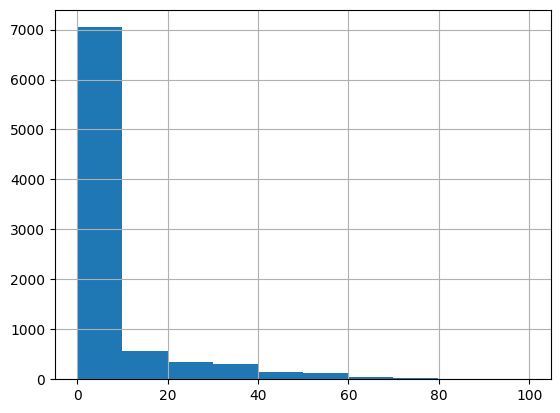

In [166]:
df['Sugar_g'].hist()

In [167]:
from scipy import stats

print(stats.skew(df['Energy_kcal']))
print(stats.skew(df['Sugar_g']))

1.1680394209139597
2.9528103557537357


In [168]:
np.log(0)

C:\Users\hegoi\AppData\Local\Temp\ipykernel_7464\2933082444.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


np.float64(-inf)

In [169]:
np.log(0+1)

np.float64(0.0)

In [170]:
np.log1p(0)

np.float64(0.0)

In [171]:
for col in df.columns:
    df[col] = np.log1p(df[col])

<Axes: >

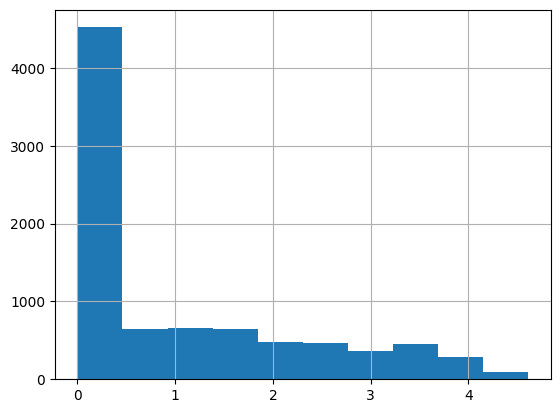

In [172]:
df['Sugar_g'].hist()

In [173]:
stats.skew(df['Sugar_g'])

np.float64(1.0034222288460226)

In [174]:
len(df.columns)

23

### Estandarizado
Estandariza cada variable.

No es necesario que dividas en train y test.

In [175]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

array([[ 1.54041394, -1.37969871,  2.22252572, ..., -0.60719321,
        -0.7007746 , -1.02653251],
       [ 1.54041394, -1.37969871,  2.22252572, ..., -0.63094868,
        -0.7007746 , -1.08029176],
       [ 1.74566103, -1.72821981,  2.39348953, ..., -1.67362391,
        -1.18406043, -1.13613927],
       ...,
       [ 0.5368946 , -1.96180649, -1.51012816, ..., -1.20172081,
        -0.81408833, -0.90032061],
       [-0.57899174,  0.72461786, -0.76879934, ...,  0.78396183,
         1.14915612, -0.15377561],
       [-0.59032935,  0.90996043, -1.1667887 , ...,  0.54480405,
         0.82341485, -0.15377561]])

### Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [176]:
df_scaled.shape

(8618, 23)

In [177]:
pca = PCA(n_components=23)
X_pca = pca.fit_transform(df_scaled)
X_pca

array([[-2.13903189, -0.96801891,  1.46398817, ..., -0.18965049,
        -0.11318379, -0.9906675 ],
       [-2.1064854 , -0.90950144,  1.48058025, ..., -0.27098865,
        -0.10503073, -0.99697913],
       [-3.26782972, -1.13842955,  2.04233529, ...,  0.04375945,
        -0.02955105, -0.96973915],
       ...,
       [-2.93052905,  1.66440526,  1.24206984, ..., -0.48350769,
         0.59177161, -0.63639048],
       [ 1.11889546, -0.78083408, -0.80512618, ..., -0.65270747,
         0.98403199,  0.37786612],
       [ 0.37955124, -1.27668203, -1.59197004, ..., -0.34724908,
         0.3352501 , -0.52011023]])

In [178]:
len(X_pca[0])

23

### Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

In [179]:
pca.explained_variance_ratio_.cumsum()

array([0.3125111 , 0.47917612, 0.56449832, 0.63561572, 0.69466103,
       0.73953892, 0.77033406, 0.79752064, 0.82289426, 0.84551716,
       0.86746341, 0.88651656, 0.90504278, 0.91936803, 0.93286501,
       0.94584362, 0.95704645, 0.96679102, 0.97608654, 0.98355611,
       0.99049601, 0.99615843, 1.        ])

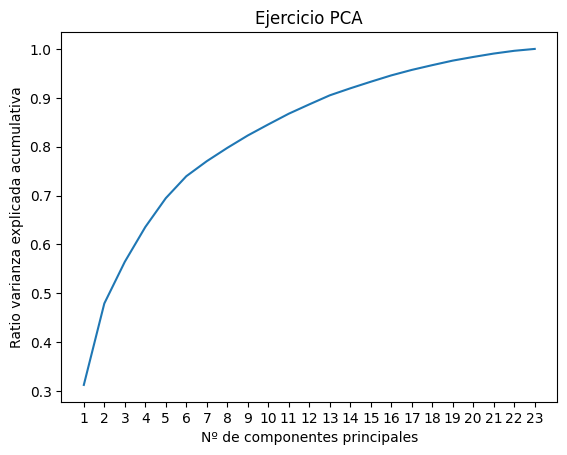

In [180]:
plt.plot(pd.Series(pca.explained_variance_ratio_.cumsum(), index=np.arange(1,24)))
plt.xlabel("Nº de componentes principales")
plt.ylabel("Ratio varianza explicada acumulativa")
plt.title("Ejercicio PCA")
plt.xticks(np.arange(1,24));

## Feat. Red
Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.

In [181]:
pca6 = PCA(n_components=6)
X_pca6 = pca6.fit_transform(df_scaled)

In [182]:
df_pca6 = pd.DataFrame(X_pca6, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
df_pca6

,PC1,PC2,PC3,PC4,PC5,PC6
0,-2.139032,-0.968019,1.463988,0.270872,4.066991,0.307222
1,-2.106485,-0.909501,1.480580,0.263240,4.032459,0.348613
2,-3.267830,-1.138430,2.042335,1.175421,4.071722,1.326607
3,1.525964,-1.264102,-0.136013,-0.929808,2.430444,-2.095054
4,1.240712,-1.204120,-0.004729,-1.192002,2.691725,-2.341876
...,...,...,...,...,...,...
8613,2.553661,-2.548700,-0.472185,-0.109428,2.716513,0.018570
8614,0.075018,-1.840922,-0.935725,-1.348908,-0.392092,-0.759672
8615,-2.930529,1.664405,1.242070,1.172396,-0.915550,-0.885902
8616,1.118895,-0.780834,-0.805126,-1.581838,1.641702,1.090002


In [183]:
df_pca_origin = pd.DataFrame(pca6.components_, columns=df.columns, index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
df_pca_origin

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
PC1,0.198045,0.277927,0.148024,0.002898,-0.026550,0.074429,0.079993,0.263414,0.215148,-0.024158,...,0.266736,0.229400,0.154403,0.188309,0.281809,0.275671,0.139021,0.295597,0.247376,0.298978
PC2,0.005434,-0.242246,-0.150170,0.439120,0.320255,0.388059,0.109656,0.007442,-0.236848,0.256138,...,0.072566,0.160926,0.204121,0.136707,0.124534,0.112675,0.259182,-0.061638,-0.225185,-0.159530
PC3,0.522265,0.079023,0.473911,0.210881,0.184202,0.136179,-0.292311,-0.159116,-0.185990,-0.394600,...,-0.096958,0.057955,-0.093723,-0.040051,0.039002,-0.073287,0.029160,-0.016400,-0.062524,-0.039190
PC4,0.064251,-0.132056,0.032874,0.038051,0.281229,-0.081251,0.086504,0.312399,0.232704,0.153351,...,0.352801,0.307120,-0.208702,-0.270591,0.124226,-0.319855,-0.327222,-0.230474,-0.164419,-0.026426
PC5,0.148431,-0.074988,0.335097,-0.094996,0.089666,-0.196324,0.544616,-0.071754,0.078367,0.127914,...,-0.046883,-0.220295,0.212893,0.008586,-0.181673,-0.044502,-0.074241,0.010867,0.095435,-0.052027
PC6,-0.056377,-0.130078,0.031900,-0.195738,-0.232627,0.056819,-0.220996,0.151959,0.055321,0.104925,...,-0.032598,-0.001320,-0.440449,0.404956,0.041904,-0.096259,0.353709,-0.273709,-0.079276,0.095311


### ¿Qué grupo de comida tiene los valores más altos en cada categoría?
Determina para cada Principal Component, los 3 grupos de comida (*FoodGroup*) con los valores del PC más altos.

In [184]:
df_last = pd.read_csv("data/nndb_flat.csv")
df_last

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,83110,Finfish and Shellfish Products,"MACKEREL,SALTED","Fish, mackerel, salted",NaN,NaN,NaN,305.0,18.50,25.10,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,90240,Finfish and Shellfish Products,"SCALLOP,(BAY&SEA),CKD,STMD","Mollusks, scallop, (bay and sea), cooked, steamed",NaN,NaN,NaN,111.0,20.54,0.84,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,90480,Sweets,"SYRUP,CANE","Syrup, Cane",NaN,NaN,NaN,269.0,0.00,0.00,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90560,Finfish and Shellfish Products,"SNAIL,RAW","Mollusks, snail, raw",NaN,NaN,NaN,90.0,16.10,1.40,...,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [185]:
df_pca6['FoodGroup'] = df_last['FoodGroup'].copy()

In [186]:
df_pca6.groupby("FoodGroup").mean().sort_values(by=['PC1'])

,PC1,PC2,PC3,PC4,PC5,PC6
FoodGroup,,,,,,
Fats and Oils,-3.268544,-0.770819,2.333724,1.045026,2.634166,2.054032
Beverages,-3.259460,0.425892,-0.958169,0.545486,-0.455704,0.652651
"Soups, Sauces, and Gravies",-3.173748,0.069457,-0.213477,0.150340,-0.328239,0.267514
Fruits and Fruit Juices,-2.923483,1.615720,-0.915614,0.186605,-0.139304,0.102528
Sweets,-1.902101,1.265913,1.209105,0.052340,0.329249,-0.555896
Vegetables and Vegetable Products,-1.533553,1.574062,-1.800941,-0.500279,-0.045454,0.165569
"Meals, Entrees, and Side Dishes",-0.924839,0.685037,0.330368,-0.118697,0.039469,-0.507225
Baby Foods,-0.792919,1.260596,-0.880836,0.494894,0.929960,-0.278374
American Indian/Alaska Native Foods,-0.758860,-0.756809,0.145467,0.087451,-0.292519,0.264564
